# MTF053 - Computer Assignment 2 (CA2) - Numerical Simulation of Boundary Layer Flows,

In this assignment you will use a commercial Computational Fluid Dynamics (CFD) software called `Star-CCM+`. Two different simulations will be done. The first involves flow over a flat plate and you will extract data from the CFD simulation to compare with the analytical/empirical formulations for laminar and turbulent boundary layers. In the second simulation you will simulate the flow over a cylinder and compare the simulated flow field with data from an experiment (provided data).

![Turbulence](https://imgs.xkcd.com/comics/cloud_swirls.png)

The assignemnt is divided into tasks some of which includes psotprocessing of data. For these tasks Python codes are provided that you can run directly in this `Jupyter NoteBook`. For some of the tasks, you are expected to write down answers to questions. This indicated as follows in the notebook: <font color=red>**write your answer here**</font>.

More detailed instructions, theory and background are given in the assignment instruction document [MTF053_CA2.pdf](https://courses.onlineflowcalculator.com/fluidmech/docs/MTF053_CA2.pdf).

## Jupyter notebook instructions

### Edit a notebook cell

Double click on the cell to enter edit mode.
   
### Update a cell

With the cell marked, klick on the play symbol in at the top of the notebook

### Add a new cell

Click on the cell above or below which you want a new cell and click on one of the symbols at the top right corner of the marked cell. Set cell type (Markdown or Code) for the new cell by clicking the cell and select *Code* or *Markdown* in the dropdown list in the top menu of the notebook. You'll find a good documentation of Markdown [here](https://www.markdownguide.org/basic-syntax/).

### Add an image in a Markdown cell

If you like to include an image in one of the Markdown text cells (for example if you want to include a photo of a derivation made on paper), do as follows:

1. upload your image using the *upload files* function

2. include the image in the notebook by writing: \!\[title\]\(image.png\)

3. typeset the cell by klicking the play icon at the top of the notebook to see the result. You can also include an image available online, add Markdown code as follows: \!\[title\]\(url\)


In [1]:
# INITIALIZATION 

#********************************************************
#
# NO NEED FOR MODIFICATIONS IN THIS NOTEBOOK SECTION
#
#********************************************************

# IMPORT THE PYTHON LIBRARIES NEEDED

import numpy as np
import matplotlib.pyplot as plt

# DEFINITION OF GLOBAL VARIABLES

FontSize  = 20
LineWidth = 2

# fluid properties

mu    =  1.8e-5 # fluid viscosity (dynamic viscosity)
rho   =  1.2    # fluid density
nu    = mu/rho

# DEFINITION OF HELP FUNCTIONS

def read_profile_from_csv_file(name):
    U = []
    y = []
    with open(name, "r") as file:
        file.readline() # read data header line
        for line in file.readlines(): # read all lines and extract y and U
            f_list = [float(i) for i in line.split(",") if i.strip ]
            U.append( f_list[0] )
            y.append( f_list[1] )
    return np.array(y),np.array(U)

def read_cylinder_pressure_from_cvs_file(name):
    theta    = []
    pressure = []
    with open(name, "r") as file:
        file.readline() # read data header line
        for line in file.readlines(): # read all lines and extract theta and mean pressure
            f_list = [float(i) for i in line.split(",") if i.strip ]
            if f_list[0] <= 180.:
                theta.append(    f_list[0] )
                pressure.append( f_list[1] ) 
    swaps=1
    while(swaps):
        swaps=0
        for i in range(len(theta)-1):
            if theta[i] > theta[i+1] :
                t1=theta[i]
                p1=pressure[i]
                theta[i]=theta[i+1]
                pressure[i]=pressure[i+1]
                theta[i+1]=t1
                pressure[i+1]=p1
                swaps=swaps+1
    return np.array(theta),np.array(pressure)    
    


# 1. Flat-Plate Boundary Layer Analysis
## Laminar flow
---
## Task 1.1
---

Determine the displacement thickness $\delta^\ast$, momentum thickness $\theta$, and the Reynolds-number ratio $Re_{\delta^\ast}/\sqrt{Re_x}$ for the three measured laminar boundary layer profiles provided in the `Python` script below. Compare your result to what can be expected from theory. Are the calculated values inline with theory?

**Hints!** 

1. In `Python` you can do the numerical integration using the function `numpy.trapz` in the `numpy` library. When estimated the integral, make sure to only use measurement points that are within the boundary layer using the following relation

$$u(\delta)\approx 0.99 U_o$$

2. The following relation derived from the Blasius solution for laminar boundary-layer flows can be of use

$$\dfrac{\delta^\ast}{x}=\dfrac{1.721}{\sqrt{Re_x}}$$


<font color=red>**write your answer here**</font>

In [2]:
# TASK 1.1 MAIN CODE

#********************************************************
#
# CODE MODIFICATIONS NEEDED:
#
# 1. CALCULATE DISPLACEMENT THICKNESS, MOMENTUM THICKNESS, 
#    AND THE REYNOLDS NUMBER RATIO Re_delta/sqrt(Re_x)
#
#********************************************************

# provided measured laminar boundary layer data

y35_exp = np.array([0.0, 0.000231, 0.000481, 0.0007059999999999999, 0.0009310000000000001, 0.001181, 0.001406, 0.001656, 0.001881, 0.0021309999999999996, 0.002356, 0.002581, 0.0028309999999999997, 0.003056, 0.003306, 0.0035310000000000003, 0.003756, 0.004006, 0.0042309999999999995, 0.004481, 0.004706, 0.005181, 0.005656, 0.006131, 0.006581])
U35_exp = np.array([0.0, 0.56, 1.139, 1.669, 2.167, 2.678, 3.078, 3.509, 3.886, 4.222, 4.505, 4.771, 5.032, 5.218, 5.396, 5.514, 5.618, 5.716, 5.762, 5.772, 5.808, 5.845, 5.845, 5.855, 5.869])

y60_exp = np.array([0.0, 0.0003, 0.000625, 0.000925, 0.0012250000000000002, 0.00155, 0.00185, 0.00215, 0.002475, 0.002775, 0.003075, 0.0034, 0.0037, 0.004, 0.004325, 0.004625, 0.004925, 0.00525, 0.00555, 0.005849999999999999, 0.006175, 0.006775000000000001, 0.0074, 0.008025000000000001, 0.008625])
U60_exp = np.array([0.0, 0.737, 1.344, 1.891, 2.367, 2.859, 3.291, 3.662, 4.049, 4.376, 4.661, 4.938, 5.149, 5.331, 5.473, 5.574, 5.672, 5.726, 5.771, 5.83, 5.849, 5.855, 5.88, 5.873, 5.854])

y90_exp = np.array([0.0, 0.0004, 0.00075, 0.001125, 0.0015, 0.001875, 0.002275, 0.00265, 0.003025, 0.0034, 0.0037749999999999997, 0.00415, 0.004525, 0.004900000000000001, 0.005275, 0.0056500000000000005, 0.00605, 0.006425, 0.0068, 0.007175, 0.007549999999999999, 0.0083, 0.00905, 0.009824999999999999, 0.010575])
U90_exp = np.array([0.0, 0.684, 1.253, 1.83, 2.335, 2.789, 3.259, 3.677, 4.066, 4.388, 4.692, 4.952, 5.175, 5.336, 5.493, 5.602, 5.719, 5.769, 5.824, 5.831, 5.858, 5.898, 5.891, 5.914, 5.923])

delta_star_35=theta_35=Re_ratio_35=0.
delta_star_60=theta_60=Re_ratio_60=0.
delta_star_90=theta_90=Re_ratio_90=0.

# <= CALCULATE DISPLACEMENT THICKNESS, MOMENTUM THICKNESS AND Re_delta/sqrt(Re_x) 
# <= FOR X=350mm, X=600mm, AND X=900mm HERE

if delta_star_35:
    print('=' * 40)
    print('displacement thickness:')
    print('=' * 40)
    print(' @x=350mm: %e m' %delta_star_35 )
    print(' @x=600mm: %e m' %delta_star_60 )
    print(' @x=900mm: %e m' %delta_star_90 )
    print()
if theta_35:
    print('=' * 40)
    print('momentum thickness:')
    print('=' * 40)
    print(' @x=350mm: %e m' %theta_35 )
    print(' @x=600mm: %e m' %theta_60 )
    print(' @x=900mm: %e m' %theta_90 )
    print()
if Re_ratio_35:
    print('=' * 40)
    print('Re_delta over sqrt(Re_x):')
    print('=' * 40)
    print(' @x=350mm: %e' %Re_ratio_35 )
    print(' @x=600mm: %e' %Re_ratio_60 )
    print(' @x=900mm: %e' %Re_ratio_90 )
    print()


---
## Task 1.2
---

The solution to the laminar flat plate velocity field was given by Blasius in 1908. The blasius profile is provided in the `Python` script below. Please note that Blasius solution is not given as $U$ and $y$, but instead in the variables $f^\prime$ and $\eta$, defined as

$$f^\prime(\eta)=\dfrac{\overline{u}}{U_o}$$

$$\eta=y\sqrt{\dfrac{U_o}{x\nu}}$$

Verify that the velocity profiles obtained from the wind tunnel experiment (U35_exp, U60_exp, and U90_exp provided in the code above) are self-similar by transforming the laminar measurement data from the three locations to Blasius variables. Plot them (in one figure) together with the Blasius solution.


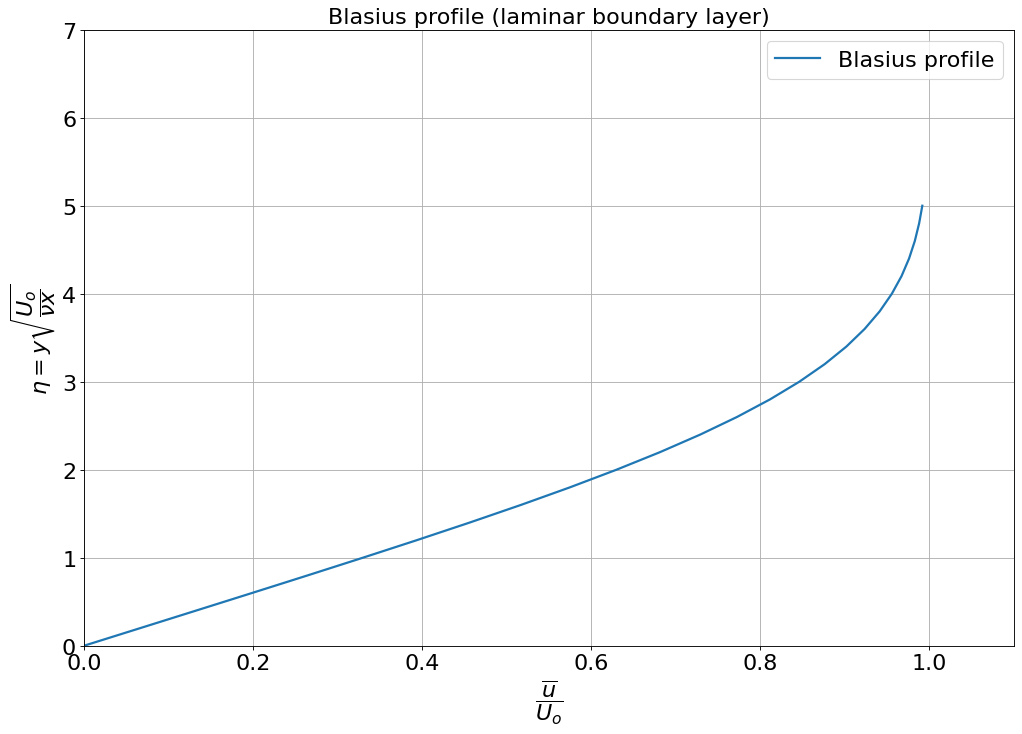

In [3]:
# TASK 1.2 MAIN CODE

#********************************************************
#
# CODE MODIFICATIONS NEEDED:
#
# 1. GENERATE NON-DIMENSIONAL VELOCITY PROFILES FROM
#    THE PROVIDED MEASURED BOUNDARY-LAYER DATA
#    (X=350mm, X=600mm, AND X=900mm)
#
# 2. PLOT THE GENERATED PROFILES
#
#********************************************************

# provided Blasius profile:

blasius_eta    = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0])
blasius_fprime = np.array([0.0, 0.06641, 0.13277, 0.19894, 0.26471, 0.32979, 0.39378, 0.45627, 0.51676, 0.57477, 0.62977, 0.68132, 0.72899, 0.77246, 0.81152, 0.84605, 0.87609, 0.90177, 0.92333, 0.94112, 0.95552, 0.96696, 0.97587, 0.98269, 0.98779, 0.99155])
    
# <= GENERATE NON-DIMENSIONAL PROFILES FROM THE LAMINAR BOUNDARY 
# <= LAYER DATA PROVIDED ABOVE (X=350mm, X=600mm, AND X=900mm) HERE  

# plot non-dimensional velocity profiles and compare to the Blasius profile

fig = plt.figure(num=1, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax  = fig.add_subplot(111)
ax.plot(blasius_fprime,blasius_eta,linewidth=LineWidth,label='Blasius profile')

# <= PLOT EXPERIMENTAL DATA HERE

ax.set_title('Blasius profile (laminar boundary layer)',fontsize=FontSize)
ax.set_xlabel(r'$\dfrac{\overline{u}}{U_o}$',fontsize=FontSize)
ax.set_ylabel(r'$\eta=y\sqrt{\dfrac{U_o}{\nu x}}$',fontsize=FontSize)
ax.legend(fontsize=FontSize)
ax.set_ylim(0.0,7.0)
ax.set_xlim(0.0,1.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(FontSize)
ax.grid()
plt.show()


## Turbulent flow

---
## Task 1.3
---

For the measured turbulent boundary-layer data provided in the `Python` code below, the friction velocity $u^\ast$ can be estimated to be 0.4171

1. Plot the mean velocity profile as $u^+ = f (y^+)$

2. Plot the rms-profile as the turbulence intensity $u^\prime/u^\ast = f (y^+)$

3. Identify the different regions in the turbulent boundary layer (define the regions by specifying approximately which ranges of $y^+$ it corresponds to)

    <font color=red>**write your answer here**</font>

4. In which region is the maximum turbulent intensity reached and why?

    <font color=red>**write your answer here**</font>


**Note!** you should use log-scale for the $y^+$ axis and a linear scale for the $u^+$ and $u^\prime/u^\ast$ axis. Use `semilogx` with $y^+$ on the x-axis.

In [4]:
# TASK 1.3 MAIN CODE

#********************************************************
#
# CODE MODIFICATIONS NEEDED:
#
# 1. GENERATE NON-DIMENSIONAL PROFILES
#
#********************************************************

# provided measured turbulent boundary layer data

y_turb_exp    = np.array([0.00015, 0.000231, 0.0003, 0.000481, 0.0006, 0.000706, 0.000931, 0.001181, 0.001406, 0.001656, 0.001881, 0.002131, 0.002356, 0.002581, 0.002831, 0.003056, 0.003306, 0.003775, 0.00415, 0.004525, 0.0049, 0.005275, 0.00605, 0.0068, 0.0072, 0.0076, 0.0083, 0.0095, 0.01057, 0.012, 0.014, 0.016, 0.019, 0.022, 0.025, 0.03])
U_turb_exp    = np.array([3.051, 3.531, 3.917, 4.579, 4.879, 5.086, 5.385, 5.637, 5.805, 5.928, 6.05, 6.139, 6.225, 6.32, 6.424, 6.463, 6.531, 6.657, 6.753, 6.828, 6.905, 6.985, 7.148, 7.265, 7.357, 7.417, 7.52, 7.693, 7.829, 7.984, 8.233, 8.449, 8.683, 8.897, 9.034, 9.121])
Urms_turb_exp = np.array([0.771, 0.826, 0.858, 0.874, 0.855, 0.836, 0.826, 0.772, 0.759, 0.73, 0.719, 0.704, 0.699, 0.696, 0.684, 0.675, 0.679, 0.663, 0.662, 0.654, 0.648, 0.632, 0.626, 0.616, 0.603, 0.599, 0.586, 0.564, 0.547, 0.522, 0.484, 0.44, 0.378, 0.308, 0.222, 0.115])

# allocate vectors

yplus_exp=np.zeros(len(y_turb_exp))
uplus_exp=np.zeros(len(y_turb_exp))
urmsp_exp=np.zeros(len(y_turb_exp))

# <= GENERATE NON-DIMENSIONAL PROFILES HERE

if( np.max(yplus_exp) != 0 and np.max(uplus_exp) != 0 and np.max(urmsp_exp) != 0 ):

    fig = plt.figure(num=1, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    (ax1, ax2) = fig.subplots(nrows=2, sharex=True)

    ax1.semilogx(yplus_exp,uplus_exp,'o',linewidth=LineWidth,label='measured')

    ax1.semilogx(np.linspace(1,20,50),np.linspace(1,20,50),linestyle='dashed',linewidth=LineWidth,label=r'$u^+=y^+$')
    ax1.semilogx([5,1000],[1./0.41*np.log(5)+5.0, 1./0.41*np.log(1000)+5.0],linestyle='dashed',linewidth=LineWidth,label=r'$u^+=\dfrac{1}{\kappa}\ln(y^+)+B$')
    ax1.set_title('Turbulent boundary layer data',fontsize=FontSize)
    ax1.set_ylabel(r'$u^+$',fontsize=FontSize)
    ax1.legend(fontsize=FontSize)
    ax1.set_xlim(1,1000)
    for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
        label.set_fontsize(FontSize)
    ax1.grid(which='both')

    ax2.semilogx(yplus_exp,urmsp_exp,'o',linewidth=LineWidth)

    ax2.set_xlabel(r'$y^+$',fontsize=FontSize)
    ax2.set_ylabel(r'$u_{rms}/u^\ast$',fontsize=FontSize)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(FontSize)
    ax2.grid(which='both')
    
    plt.show()


## Comparison between simulations and experiments
---
## Task 1.4
---


1. Plot the three different velocity profiles obtained from the laminar boundary layer simulation (0.35m, 0.60m, 0.90m) compared to the corresponding measured data provided above (task 1.1)

    Upload the csv-files extracted from `Star-CCM+` in `Jupyter Lab` first

2. Comment on, and try to explain, any significant differences in the profiles extracted from the CFD simulation and the corresponding profiles obtained from measured data. 

    <font color=red>**write your answer here**</font>



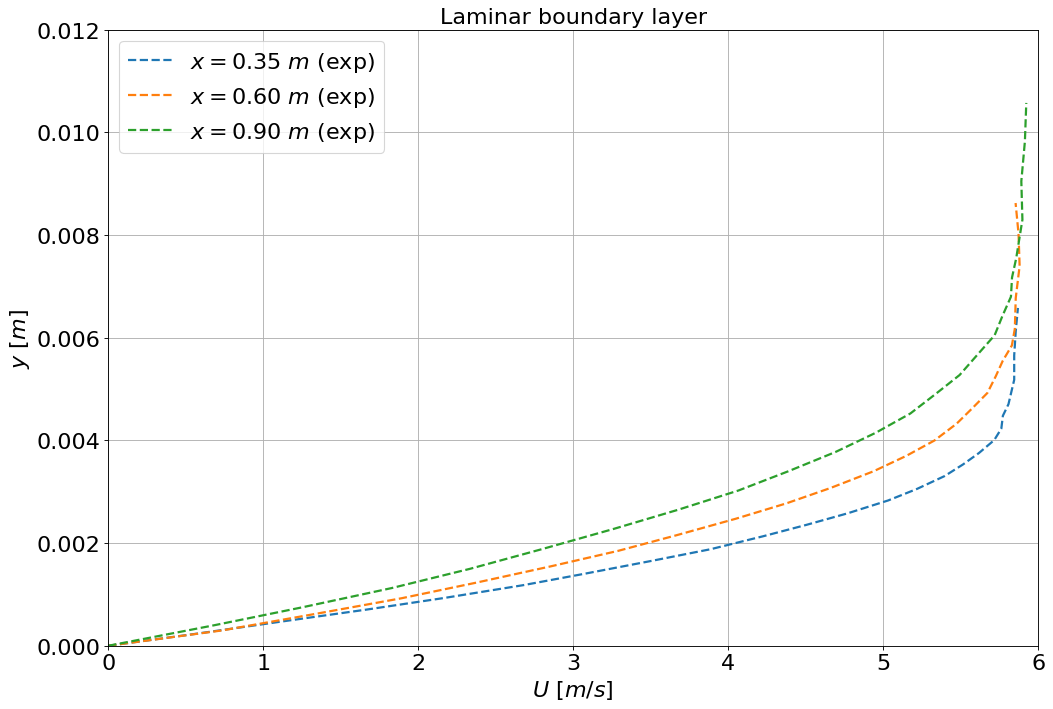

In [5]:
# TASK 1.4 MAIN CODE

#********************************************************
# CODE MODIFICATIONS NEEDED:
#
# 1. READ BOUNDARY LAYER DATA FROM FILE 
#    (X=350mm, X=600mm, AND X=900mm)
#
#********************************************************

# load laminar boundary-layer data extracted from CFD

y35_CFD = []
U35_CFD = []
y60_CFD = []
U60_CFD = []
y90_CFD = []
U90_CFD = []

# <= READ DATA FROM FILE HERE 

#y35_CFD,U35_CFD = read_profile_from_csv_file("filename.csv")
#y60_CFD,U60_CFD = read_profile_from_csv_file("filename.csv")
#y90_CFD,U90_CFD = read_profile_from_csv_file("filename.csv")

# make a plot comparing the data extraced from CFD and the corresponding measured data

fig = plt.figure(num=1, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax  = fig.add_subplot(111)

line35, = ax.plot(U35_exp,y35_exp,linewidth=LineWidth,linestyle='dashed',label=r'$x=0.35\ m$ (exp)')
line60, = ax.plot(U60_exp,y60_exp,linewidth=LineWidth,linestyle='dashed',label=r'$x=0.60\ m$ (exp)')
line90, = ax.plot(U90_exp,y90_exp,linewidth=LineWidth,linestyle='dashed',label=r'$x=0.90\ m$ (exp)')

if len(y35_CFD):
    ax.plot(U35_CFD,y35_CFD,linewidth=LineWidth,color = line35.get_color(),label=r'$x=0.35\ m$ (CFD)')
if len(y60_CFD):
    ax.plot(U60_CFD,y60_CFD,linewidth=LineWidth,color = line60.get_color(),label=r'$x=0.60\ m$ (CFD)')
if len(y90_CFD):
    ax.plot(U90_CFD,y90_CFD,linewidth=LineWidth,color = line90.get_color(),label=r'$x=0.90\ m$ (CFD)')

ax.set_title('Laminar boundary layer',fontsize=FontSize)
ax.set_xlabel(r'$U\ [m/s]$',fontsize=FontSize)
ax.set_ylabel(r'$y\ [m]$',fontsize=FontSize)
ax.legend(fontsize=FontSize)
ax.set_ylim(0.0,0.012)
ax.set_xlim(0.0,6.0)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(FontSize)
ax.grid()
plt.show()


---
## Task 1.5
---

1. Plot the turbulent data from the CFD simulation compared to the corresponding data provided above (task 1.3)

2. Comment on the predicted turbulent flat-plate boundary layer velocity profile in relation to the corresponding measured data 
    
    1. Does the result look like you expected? 
    
        <font color=red>**write your answers here**</font>
    
    2. Do you think that the results could be improved and in that case how? 
    
        <font color=red>**write your answers here**</font>
    
    3. Can you think of any significant sources of error? 
    
        <font color=red>**write your answers here**</font>


**Note!** it might be good to know that the measured data were obtained using hot-wire anemometry, a technique where a thin tungsten wire is heated by an electric current and the cooling effect introduced by the flow is measured, which can be converted to fluid velocity. When a flat-plate boundary layer is measured, the hot-wire probe (see illustration below) is traversed vertically through the boundary layer to measure the velocity at different wall-normal coordinates.

![hotwire](https://fluidmech.onlineflowcalculator.com/Assignments/CA2/Images/hotwire.png)

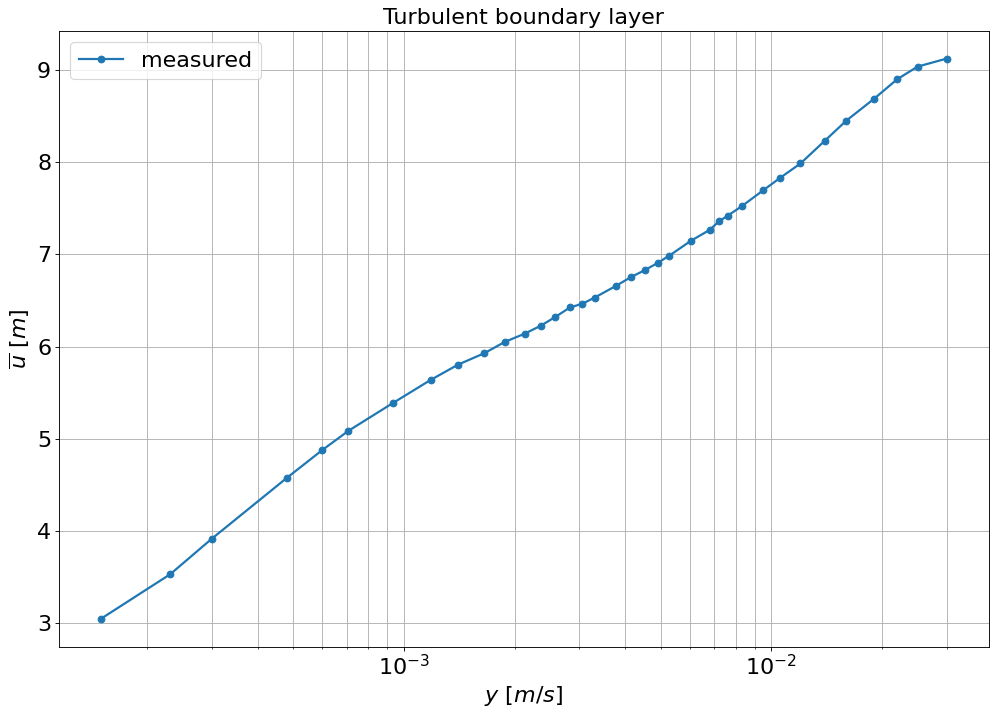

In [6]:
# TASK 1.5 MAIN CODE

#********************************************************
#
# CODE MODIFICATIONS NEEDED:
#
# 1. READ DATA EXPORTED FROM STAR-CCM+
#
#********************************************************

# read turbulent boundary layer data extracted from CFD

y_turb_CFD = []
U_turb_CFD = []

# <= READ CFD DATA HERE
# y_turb_CFD,U_turb_CFD = read_profile_from_csv_file("filename.csv")

# make a plot comparing the data extraced from CFD and the corresponding measured data

fig = plt.figure(num=1, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax  = fig.add_subplot(111)

ax.semilogx(y_turb_exp,U_turb_exp,'-o',linewidth=LineWidth,label='measured')
if ( len(y_turb_CFD) and len(U_turb_CFD) ):
    ax.semilogx(y_turb_CFD,U_turb_CFD,'-o',linewidth=LineWidth,label='CFD')

ax.set_title('Turbulent boundary layer',fontsize=FontSize)
ax.set_xlabel(r'$y\ [m/s]$',fontsize=FontSize)
ax.set_ylabel(r'$\overline{u}\ [m]$',fontsize=FontSize)
ax.legend(fontsize=FontSize)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(FontSize)
ax.grid(which='both')
plt.show()

# 2. Flow around a cylinder
---
## Task 2.1
---
Plot the `Mean Static Pressure` profile along the cylinder surface using data extracted from the simulation and the provided measured pressure distribution over a cylinder in the same figure (if you have done the hands-on lab - *flow around immersed bodies* - you can use the measured data from the lab as well). 

Do the numerical results match qualitatively and/or quantitatively with the measured data? E.g., is the separation point the same? 

<font color=red>**write your answer here**</font>


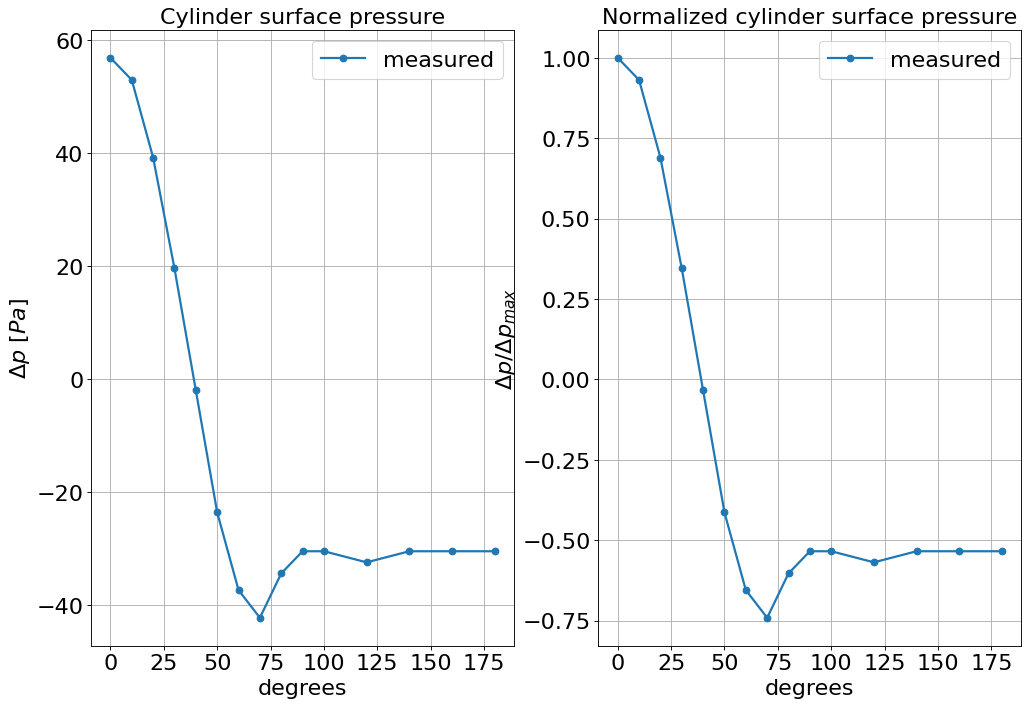

In [7]:
# TASK 2.1 MAIN CODE

#********************************************************
#
# CODE MODIFICATIONS NEEDED:
#
# 1. READ DATA EXPORTED FROM STAR-CCM+
#
#********************************************************

cylinder_degrees_exp  = np.array([0,10,20,30,40,50,60,70,80,90,100,120,140,160,180])
cylinder_pressure_exp = np.array([56.898,52.974,39.24,19.62,-1.962,-23.544,-37.278,-42.183,-34.335,-30.411,-30.411,-32.373,-30.411,-30.411,-30.411])

cylinder_degrees_CFD  = []
cylinder_pressure_CFD = []

# <= READ CFD DATA HERE
# cylinder_degrees_CFD, cylinder_pressure_CFD = read_cylinder_pressure_from_cvs_file("filename.csv")

# make a plot comparing the data extraced from CFD and the corresponding measured data

fig = plt.figure(num=1, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax  = fig.add_subplot(121)

ax.plot(cylinder_degrees_exp,cylinder_pressure_exp,'-o',linewidth=LineWidth,label='measured')

if ( len(cylinder_degrees_CFD) and len(cylinder_pressure_CFD) ):
    ax.plot(cylinder_degrees_CFD,cylinder_pressure_CFD,'-o',linewidth=LineWidth,label='CFD')

ax.set_title('Cylinder surface pressure',fontsize=FontSize)
ax.set_xlabel('degrees',fontsize=FontSize)
ax.set_ylabel(r'$\Delta p\ [Pa]$',fontsize=FontSize)
ax.legend(fontsize=FontSize)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(FontSize)
ax.grid()

ax  = fig.add_subplot(122)

ax.plot(cylinder_degrees_exp,cylinder_pressure_exp/np.max(cylinder_pressure_exp),'-o',linewidth=LineWidth,label='measured')

if len(cylinder_degrees_CFD):
    ax.plot(cylinder_degrees_CFD,cylinder_pressure_CFD/np.max(cylinder_pressure_CFD),'-o',linewidth=LineWidth,label='CFD')

ax.set_title('Normalized cylinder surface pressure',fontsize=FontSize)
ax.set_xlabel('degrees',fontsize=FontSize)
ax.set_ylabel(r'$\Delta p/\Delta p_{max}$',fontsize=FontSize)
ax.legend(fontsize=FontSize)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(FontSize)
ax.grid()
plt.show()


---
## Task 2.2
---

Show the residuals plot and another plot that justifies that the simulation has run long enough and is converged.

**Note!:** you might need to run it longer than the specified 0.5s 

1. extract plots from `Star-CCM+`
2. upload extracted images to `Jupyter Lab`
3. include the uploaded images in this notebook using the following Markdown code \!\[title\]\(filename\)

<font color=red>**include your figures here**</font>

---
## Task 2.3
---
The cylinder force monitor signal that you extracted as part of simulation 2 should, if done correctly, be oscillating with a very pronounced sinusoidal shape. Calculate the dominating frequency of the signal. Calculate the corresponding Strouhal number (non-dimensional frequency). 

$$St=\dfrac{fD}{U_\infty}$$

1. What Strouhal number do you get?

   <font color=red>**write your answer here**</font>

2. Compare your result with the data presented in the figure below. Does your result agree with the data provided in the figure?

   <font color=red>**write your answer here**</font>

3. What is the cause of the oscillation of the cylinder force? 

   <font color=red>**write your answer here**</font>

**Hint:** run the cylinder simulation with the `Vorticity Scene` open and observe what happens with the flow over time as the simulation runs.

![Strouhal](https://fluidmech.onlineflowcalculator.com/Assignments/CA2/Images/Strouhal.png)
